<h3><b>Problem:</b></h3>You	need to perform	image	classification on the	given	images and categorize them into the	given	categories. 	
 
<h4><b>Background:</b></h4>	
The	dataset	comprises	of images	of	different	geometries categorized into 4	classes.	We	need	to perform image classification	on it.<br>	 
<b>Data:</b> This	data consists	of two parts are as follows:-	
  <ul>
  <li>Train	:	~200	images</li>
  <li>Test	:	~50	images.</li>	
 </ul> 

In [1]:
#Connected to GoogleDrive for acessing dataset in folder Input
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Phase I-A:- Importing Libraries 
#8
import cv2 
import numpy as np
import pandas as pd
import warnings

#sklearn packages
from sklearn.model_selection import train_test_split #7

#Keras packages
from keras.utils import to_categorical  #1
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout #2
from keras.models import Sequential #3
from keras import optimizers #4
from keras.preprocessing.image import ImageDataGenerator #5
from keras.callbacks import EarlyStopping #6

#To see our directory
import os
import random
import gc

# Visualize Library
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
print("Librares Loaded")

Using TensorFlow backend.


Librares Loaded


<ul>
  <li>1 -> One hot encode to categorical values</li>
  <li>2 -> Convolution2d to with images which of 2d, Dense to create fully connected layers, Dropout to make sure model doesn't overfit. </li>
  <li>3 -> Package for dealing with CNN as its sequence of layers</li>
  <li>4 -> An optimizer is one of the two arguments required for compiling a Keras model</li>
  <li>5 -> Generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches).</li>
  <li>6 -> To stop executing after a maximum trashold is reached or minimal loss is reached.</li>
  <li>7 -> To split data into trainning sets and evaluation set</li>
  <li>8 -> Packages to preprocess images.</li>
 </ul>

In [0]:
def trainload():
  #Dataset Dict Variables
  cate_1_dir = '../content/drive/My Drive/Colab Notebooks/Input/Dataset/train/category 1'
  cate_2_dir = '../content/drive/My Drive/Colab Notebooks/Input/Dataset/train/category 2'
  cate_3_dir = '../content/drive/My Drive/Colab Notebooks/Input/Dataset/train/category 3'
  cate_4_dir = '../content/drive/My Drive/Colab Notebooks/Input/Dataset/train/category 4'
  
  #list of Train categories
  category_1 = ['../content/drive/My Drive/Colab Notebooks/Input/Dataset/train/category 1/{}'.format(i) for i in os.listdir(cate_1_dir) if 'category 1' in i] 
  category_2 = ['../content/drive/My Drive/Colab Notebooks/Input/Dataset/train/category 2/{}'.format(i) for i in os.listdir(cate_2_dir) if 'category 2' in i]  
  category_3 = ['../content/drive/My Drive/Colab Notebooks/Input/Dataset/train/category 3/{}'.format(i) for i in os.listdir(cate_3_dir) if 'category 3' in i]
  category_4 = ['../content/drive/My Drive/Colab Notebooks/Input/Dataset/train/category 4/{}'.format(i) for i in os.listdir(cate_4_dir) if 'category 4' in i]

  train_imgs = category_1[:103] + category_2[:107] + category_3[:112] + category_4[:119]  # Adding all images into a single a variable.
  random.shuffle(train_imgs)  # shuffle it randomly

  print("Data Loaded")
  #Clear list that are useless
  del category_1
  del category_2
  del category_3
  del category_4
  gc.collect()   #collect garbage to save memory
  
  return train_imgs

In [0]:
def read_and_process_image(list_of_images):
    """
    Returns two arrays: 
        X is an array of resized images
        y is an array of labels
    """
    X = [] # images
    y = [] # labels
    nrows = 150
    ncolumns = 150
    channels = 3
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows,ncolumns), interpolation=cv2.INTER_CUBIC))  #Read the image
        #get the labels
        if 'category 1' in image:
            y.append(0)
        elif 'category 2' in image:
            y.append(1)
        elif 'category 3' in image:
            y.append(2)
        elif 'category 4' in image:
            y.append(3)
        
    print("Data Processed")
    return X, y


In [5]:
train_imgs = trainload()
X, y = read_and_process_image(train_imgs)


Data Loaded
Data Processed


In [6]:
print("Train shape: {}".format(len(X)))
print("Test shape: {}".format(len(y)))

Train shape: 440
Test shape: 440


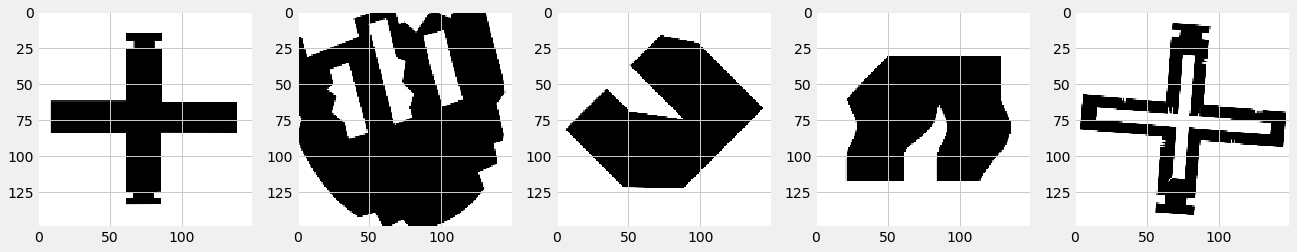

In [7]:
#Visualizing 5 images
plt.figure(figsize=(20,10))
columns = 5
for i in range(columns):
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(X[i])

Shape of train images is: (440, 150, 150, 3)
Shape of labels is: (440, 4)


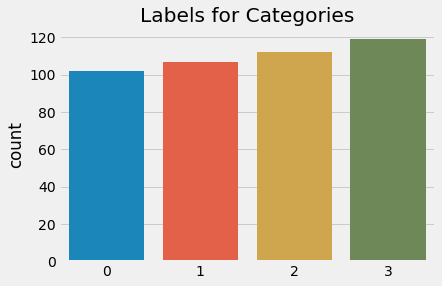

In [8]:
#Converting variables to ndarrays
X = np.array(X)
y = np.array(y)

#Lets plot the label to be sure we just have two class
sns.countplot(y)
plt.title('Labels for Categories')

y = to_categorical(y)# OneHot Encoding of Y Labels
print("Shape of train images is:", X.shape)
print("Shape of labels is:", y.shape)

In [9]:
#spliting X and y into train and evalution sets with size of 200 and 50 repectively. 
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=200, test_size=50, random_state=2)

print("Shape of train images is:", X_train.shape)
print("Shape of validation images is:", X_val.shape)
print("Shape of labels is:", y_train.shape)
print("Shape of labels is:", y_val.shape)

Shape of train images is: (200, 150, 150, 3)
Shape of validation images is: (50, 150, 150, 3)
Shape of labels is: (200, 4)
Shape of labels is: (50, 4)


In [0]:
#Phase II:- Intiallizing CNN
def model():
  classifer = Sequential()
  classifer.add(Conv2D(32,(3,3),input_shape=(150,150,3), activation='relu'))
  classifer.add(MaxPooling2D(2,2))
  classifer.add(Conv2D(64,(3,3),activation='relu'))
  classifer.add(MaxPooling2D(2,2))
  classifer.add(Conv2D(128,(3,3),activation='relu'))
  classifer.add(MaxPooling2D(2,2))
  classifer.add(Conv2D(128,(3,3),activation='relu'))
  classifer.add(MaxPooling2D(2,2))
  classifer.add(Flatten())
  classifer.add(Dropout(rate=0.5))
  classifer.add(Dense(512,activation='relu'))
  classifer.add(Dense(4,activation='sigmoid'))
  classifer.compile(optimizer=optimizers.Adam(lr=0.001),metrics=['accuracy'],loss='categorical_crossentropy')
  return classifer

In [11]:
classifer = model()
classifer.summary()

W0816 18:08:23.791994 140313428506496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0816 18:08:23.808314 140313428506496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0816 18:08:23.812339 140313428506496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0816 18:08:23.834636 140313428506496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0816 18:08:23.915274 140313428506496 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
#Phase III:- Fitting into the dataset
def fit_model(X_train,X_val,y_train,y_val):
  train_datagen = ImageDataGenerator(
          rescale=1./255,
          shear_range=0.2,
          zoom_range=0.2,
          horizontal_flip=True)

  test_datagen = ImageDataGenerator(rescale=1./255)

  train_set = train_datagen.flow(
          X_train,y_train,
          batch_size=32)

  test_set = test_datagen.flow(
          X_val,y_val,
          batch_size=32)

  history = classifer.fit_generator(
            train_set,
            steps_per_epoch=200,
            epochs=5,
            validation_data=test_set,
            validation_steps=50)
  print("Model Trained")
  print("Accuracy on Train Set : {}".format(history.history['acc'][-1]))
  print("Loss on Train Set: {}".format(history.history['loss'][-1]))
  print("Accuracy on Testset: {}".format(history.history['val_acc'][-1]))
  print("Loss on Test Set: {}".format(history.history['val_loss'][-1]))
  return(history)

In [13]:
history = fit_model(X_train,X_val,y_train,y_val)

W0816 18:08:24.213485 140313428506496 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
200/200 [==============================] - 304s 2s/step - loss: 0.1844 - acc: 0.9280 - val_loss: 0.5281 - val_acc: 0.8800
Epoch 2/5
200/200 [==============================] - 300s 2s/step - loss: 0.0440 - acc: 0.9864 - val_loss: 0.4535 - val_acc: 0.9400
Epoch 3/5
200/200 [==============================] - 296s 1s/step - loss: 0.0437 - acc: 0.9870 - val_loss: 0.6328 - val_acc: 0.9000
Epoch 4/5
200/200 [==============================] - 291s 1s/step - loss: 0.0021 - acc: 0.9992 - val_loss: 0.6257 - val_acc: 0.9200
Epoch 5/5
200/200 [==============================] - 293s 1s/step - loss: 0.0033 - acc: 0.9983 - val_loss: 0.6716 - val_acc: 0.9200
Model Trained
Accuracy on Train Set : 0.9980796089385475
Loss on Train Set: 0.003564673315843954
Accuracy on Testset: 0.9199999966621399
Loss on Test Set: 0.6716129581264686


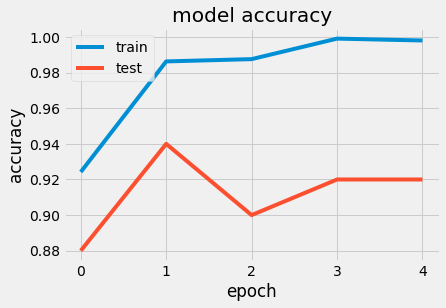

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

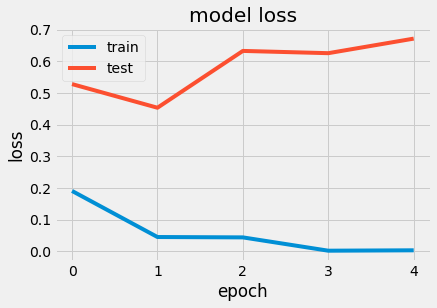

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
#Phase IV:- Processing and Predecting Test Set
test_datagen1 = ImageDataGenerator(rescale=1./255)
test_dir = '../content/drive/My Drive/Colab Notebooks/Input/Dataset/test'
def loadImages(path):
    # Put files into lists and return them as one list of size 4
    image_files = sorted([os.path.join(path, file)
         for file in os.listdir(path) if      file.endswith('.png')])
 
    return image_files

In [0]:
def processing(data):
    # loading image
    # Getting 3 images to work with 
    img = [cv2.imread(i, cv2.IMREAD_COLOR) for i in data]
    # --------------------------------
    # setting dim of the resize
    height = 150
    width = 150
    dim = (width, height)
    res_img = []
    for i in range(len(img)):
        res = cv2.resize(img[i], dim, interpolation=cv2.INTER_CUBIC)
        res_img.append(res)

    # Checcking the size
    print("RESIZED", res_img[1].shape)
    r =np.array(res_img)
    print(r.shape)
    return r
    

In [18]:
t_img = loadImages(test_dir)
pro = processing(t_img)

RESIZED (150, 150, 3)
(30, 150, 150, 3)


In [0]:
prediction = classifer.predict_classes(pro)

In [20]:
prediction

array([0, 0, 0, 0, 0, 2, 1, 1, 3, 3, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 3])